In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('data.xls')

data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data_numeric_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()
data_numeric_columns
#to select categorical columns use
#data_cat_columns=data.select_dtypes(include=['object']).columns.tolist()
data[data_numeric_columns]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X=data.drop('diagnosis',axis=1)#features
Y=data['diagnosis'] #target column

In [ ]:
#step 1 standardize the feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
X.shape

(569, 30)

In [ ]:
pca=PCA()
pca.fit(X_scaled)
#calculate the explained variance ratio and its cumulative sum
cumulative_variance=pca.explained_variance_ratio_.cumsum()
n_components=(cumulative_variance>=0.95).argmax()+1
n_components,cumulative_variance

(10,
 array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
        0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
        0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
        0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
        0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
        0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ]))

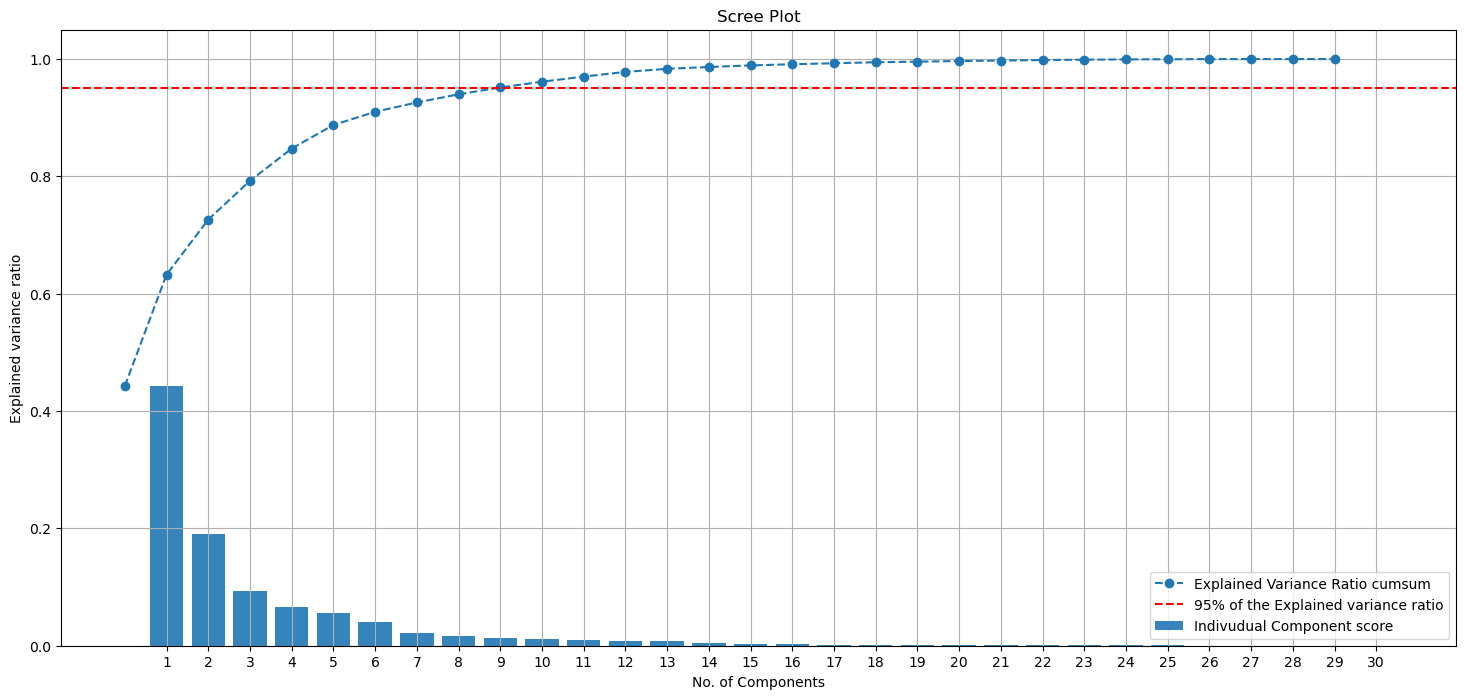

In [ ]:
import matplotlib.pyplot as plt
explained_variance_ratio_cancer=pca.explained_variance_ratio_
plt.figure(figsize=(18,8))
plt.plot(np.cumsum(explained_variance_ratio_cancer),marker='o',
         linestyle='--',label='Explained Variance Ratio cumsum')
plt.bar(range(1,len(explained_variance_ratio_cancer)+1),
        explained_variance_ratio_cancer,
        alpha=0.9,label='Indivudual Component score')
plt.title('Scree Plot')
plt.xlabel('No. of Components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=0.95,color='r',linestyle='--',
            label='95% of the Explained variance ratio')
plt.xticks(range(1,len(explained_variance_ratio_cancer)+1))
plt.legend()
plt.grid()
plt.show()

In [ ]:
pca=PCA(n_components=11)#no. of components +1 >0.95 10 components
pca.fit(X_scaled)
prop_var=pca.explained_variance_ratio_
n_components=np.arange(pca.n_components_)+1



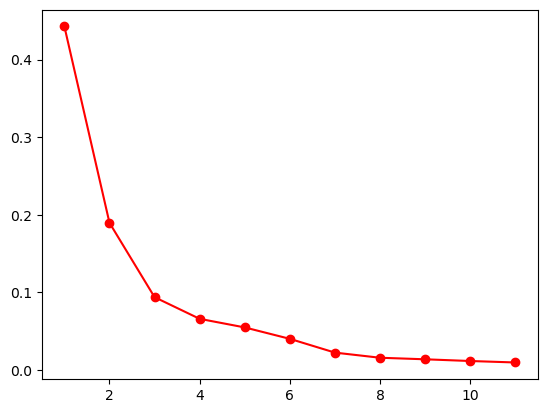

In [ ]:
plt.plot(n_components,prop_var,'ro-')
plt.show()

In [ ]:
#the optimal n_components is 2 as per scree plot
pca_final=PCA(n_components=2)
pca_components=pca_final.fit_transform(X_scaled)

In [ ]:
loading=pca_final.components_
feature_names=X.columns
pc1_loading=pd.Series(loading[0],index=feature_names)
pc1_loading_sort=pc1_loading.abs().sort_values(ascending=False)
print('PC1',pc1_loading_sort)
pc2_loading=pd.Series(loading[1],index=feature_names)
pc2_loading_sort=pc2_loading.abs().sort_values(ascending=False)
print('PC2',pc2_loading_sort)

PC1 concave points_mean        0.260854
concavity_mean             0.258400
concave points_worst       0.250886
compactness_mean           0.239285
perimeter_worst            0.236640
concavity_worst            0.228768
radius_worst               0.227997
perimeter_mean             0.227537
area_worst                 0.224871
area_mean                  0.220995
radius_mean                0.218902
perimeter_se               0.211326
compactness_worst          0.210096
radius_se                  0.205979
area_se                    0.202870
concave points_se          0.183417
compactness_se             0.170393
concavity_se               0.153590
smoothness_mean            0.142590
symmetry_mean              0.138167
fractal_dimension_worst    0.131784
smoothness_worst           0.127953
symmetry_worst             0.122905
texture_worst              0.104469
texture_mean               0.103725
fractal_dimension_se       0.102568
fractal_dimension_mean     0.064363
symmetry_se             

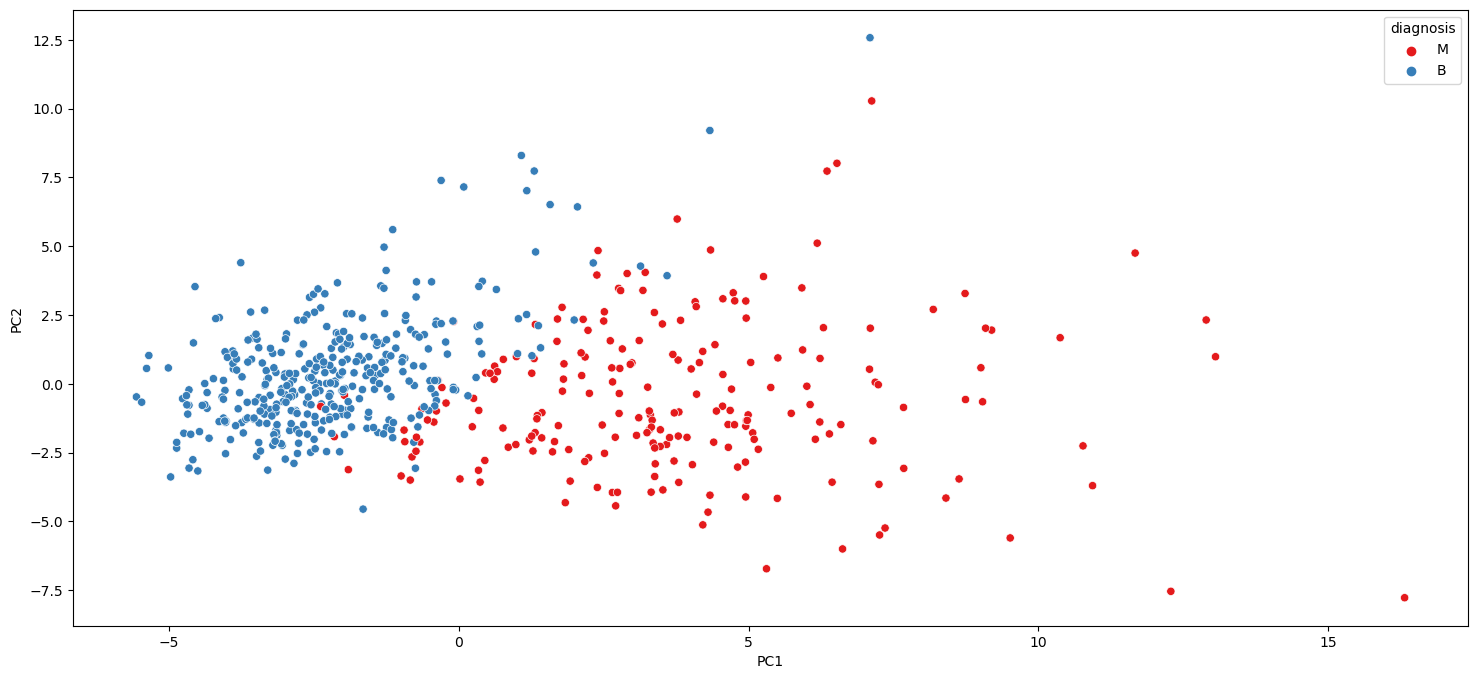

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
data_final=pd.DataFrame(data=pca_components,columns=['PC1','PC2'])
finaldf=pd.concat([data_final,Y],axis=1)
finaldf
sns.scatterplot(x=finaldf['PC1'],y=finaldf['PC2'],hue=finaldf['diagnosis'],
                palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        569 non-null    float64
 1   PC2        569 non-null    float64
 2   diagnosis  569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
X=finaldf.drop('diagnosis',axis=1)
Y=finaldf['diagnosis']
lbl=LabelEncoder()
y_encoded=lbl.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,
                                               random_state=42)


In [ ]:
rnd=RandomForestClassifier(n_estimators=100,random_state=42)
rnd.fit(X_train,Y_train)
y_pred=rnd.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

